## Image classification Model

In [1]:
import numpy as np
import gzip # This is used in extracting the images

import matplotlib.pyplot as plt # In order to plot the images
from sklearn.ensemble import RandomForestClassifier # Random Forest to classify the images
from sklearn.metrics import accuracy_score # Sklearn's way of measuring accuracy
from sklearn.metrics import classification_report 


# The data

The dataset used is called `MNIST`. This is a large collection of hand-drawn digits `0 to 9` and is a good dataset to learn image classification on as it requires little to no preprocessing.

The dataset can be downloaded from [The MNIST Database](https://web.archive.org/web/20220331130319/https://yann.lecun.com/exdb/mnist/). Download all four files. These files are the images and their respective labels (normally, we're required to split the x (image data / characteristics) and y (labels) out during preprocessing, but this has already been done for us). The dataset has also already been split into a train and a test set.

Once you've downloaded the data, make sure that the data are in the same folder as this Jupyter notebook. 

By default, the MNIST files are compressed in the gzip format. The following two functions will extract the data for you. 

In [2]:
def extract_data(filename, num_images, IMAGE_WIDTH):
    """Extract the images into a 4D tensor [image index, y, x, channels]."""
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    """Extract the labels into a vector of int64 label IDs."""
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

## Extracting the data

The MNIST dataset consists of 60,000 training images and 10,000 testing images. I created a function `get_data` that uses the above functions to extract a certain number of images and their labels from the gzip files.

The function takes as input two integer values, the number of train and test images to be extracted. On this case I extract `5000` train images and `1000` test images. The function then returns four variables in the form of `(X_train, y_train), (X_test, y_test)`, where `(X_train, y_train)` are the extracted images and labels of the training set, and `(X-test, y_test)` are the extracted images and labels of the testing set. 

Image pixel values range from 0 to 255. It is needed to normalise the image pixels so that they are in the range 0 to 1.

_**Note**_ that the size of the MNIST images is 28x28.

In [3]:
def get_data(num_train_images,num_test_images):
    # Extracting training data and labels
    X_train = extract_data('train-images-idx3-ubyte.gz', num_train_images, 28)
    y_train = extract_labels('train-labels-idx1-ubyte.gz', num_train_images)
    
    # Extracting testing data and labels
    X_test = extract_data('t10k-images-idx3-ubyte.gz', num_test_images, 28)
    y_test = extract_labels('t10k-labels-idx1-ubyte.gz', num_test_images)
    
    # Normalize pixel values
    X_train /= 255.0
    X_test /= 255.0
    
    return (X_train, y_train), (X_test, y_test)

## Plotting the data

Right now the images are "flattened" into a 1-D array of length 784. In order to plot the image we first need to reshape it to the correct size of 28x28. The respective label is also printed out to make sure the right number is being plotted.

(5000, 784)
0.10980392
6
Label:  1


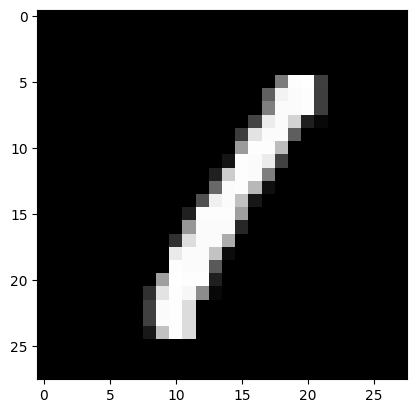

In [4]:
# Call get_data function to load the data
(X_train, y_train), (X_test, y_test) = get_data(5000, 1000)
print(X_train.shape)
print(X_train[1, 349])
print(y_test[50])

image_index = 3 ## Change me to view different images

print("Label: ", y_train[image_index])
reshaped_image = X_train[image_index].reshape((28, 28))

plt.imshow(reshaped_image, cmap='gray')
plt.show()

## Training the model

The data is now formatted, a model can be fitted using sklearn's `RandomForestClassifier` class with `20 estimators` and its `random_state` set to `42`. Here I write a function that will take as input the image and label variables that were created previously, and return a trained model.

In [5]:
def train_model(X_train, y_train):
    # Create RandomForestClassifier instance with 20 estimators and random state 42
    clf = RandomForestClassifier(n_estimators=20, random_state=42)
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    return clf

In [6]:
clf = train_model(X_train, y_train)

## Testing the model

The model is trained, let's see how well it does on the test set. 

In [7]:
def calculate_accuracy(clf, X_test, y_test):
    # Use the trained model to make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy by comparing predicted labels to true labels
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [8]:
print(calculate_accuracy(clf,X_test,y_test))

0.891


Classification reports give us more information on where our model is going wrong – looking specifically at the performance caused by Type I and II errors. Here is a function that returns the classification report of the test set.

In [9]:
def get_class_report(clf, X_test, y_test):
    # Use the trained model to make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Generate a classification report
    report = classification_report(y_test, y_pred)
    
    return report

In [10]:
print(get_class_report(clf,X_test,y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.98      0.98      0.98       126
           2       0.88      0.90      0.89       116
           3       0.84      0.83      0.84       107
           4       0.86      0.90      0.88       110
           5       0.86      0.85      0.86        87
           6       0.91      0.93      0.92        87
           7       0.88      0.85      0.87        99
           8       0.93      0.78      0.85        89
           9       0.81      0.88      0.85        94

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



## Plotting the results

Now check if the model has trained correctly. To do so, I need to plot some of the images with their predicted labels. 

Predicted Label:  7


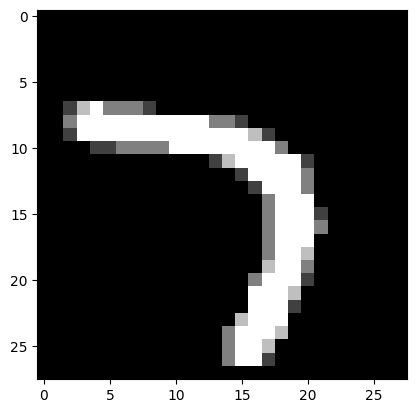

In [11]:
preds = clf.predict(X_test)

image_index = 60 ## Change me to see other predictions

print("Predicted Label: ",preds[image_index])
plt.imshow(X_test[image_index].reshape((28, 28)), cmap='gray')
plt.show()